In [5]:
!pip install pandas matplotlib textblob scipy
!python -m textblob.download_corpora

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_da

# importing

In [6]:
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Loading and cleaning the data

In [12]:
news_path = r"D:/programming/python tenx/Financial-news-sentiment-stock-analysis/Data/raw_analyst_ratings.csv"
stock_path = r"D:/programming/python tenx/Financial-news-sentiment-stock-analysis/Data/yfinance_data/AAPL_historical_data.csv"

news_df = pd.read_csv(news_path)
stock_df = pd.read_csv(stock_path)

news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce').dt.date


# Sentiment Analysis

In [13]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

Aggregate Sentiment by Date

In [14]:
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment': 'avg_sentiment'}, inplace=True)

Calculate Stock Returns

In [15]:
stock_df = stock_df.sort_values('Date')
stock_df['daily_return'] = stock_df['Close'].pct_change()

Merge on Dates

In [16]:
merged = pd.merge(daily_sentiment, stock_df, left_on='date', right_on='Date')
merged.dropna(subset=['avg_sentiment', 'daily_return'], inplace=True)

Correlation Analysis

Pearson Correlation: -0.0020 (p-value: 0.9236)


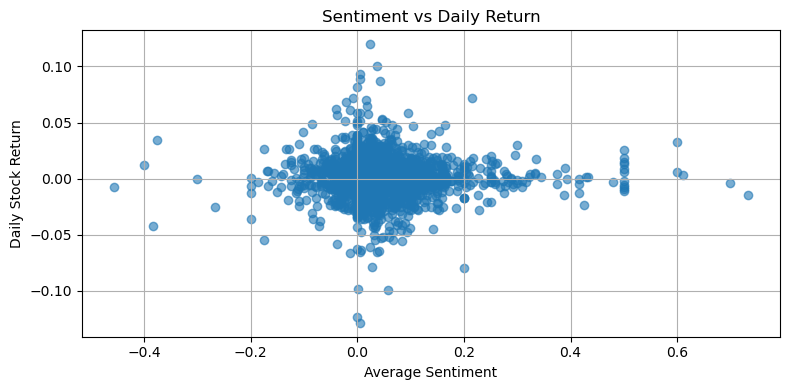

In [19]:
corr, pval = pearsonr(merged['avg_sentiment'], merged['daily_return'])
print(f"Pearson Correlation: {corr:.4f} (p-value: {pval:.4f})")

plt.figure(figsize=(8, 4))
plt.scatter(merged['avg_sentiment'], merged['daily_return'], alpha=0.6)
plt.title('Sentiment vs Daily Return')
plt.xlabel('Average Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.tight_layout()
plt.show()
